**Problem Statement**

Predicting the retail customer retention potential level as high/medium/low & Customer Segmentation & Pattern extraction.

In order to provide customers with better products and service delivery than the competition, retailers establish metrics to measure customer response to the product, service, price, and competition. A consumer is considered to have churned in the retail industry once a certain number of transactions, interactions, or visits have passed. This occurs when the product or service is no longer used or when a competitor's product or service is used. In order to win back a defection, it is helpful to comprehend the interests and preferences of the consumer.

**Data Description**

Data consists of transactions made by the customers, emails sent to the customers, customers profile and preferences data. Columns are defined as follows:

*   CustomerID
*   City
*   DateOfRegistration
*   OnlineCommunication
*   AutomaticRefill
*   DoorstepDelivery
*   PreferredDeliveryDay
*   DateOfemail
*   EmailType
*   timestamp
*   MailOpened
*   MailClicked
*   OrderQuantity
*   RetentionPotential





####Loading

In [ ]:
##importing the necessary libraries in accordance with the problem statement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")


In [ ]:
#loading every dataset provided by the train data
Customerdata = pd.read_excel('/content/Customerdata_Train.xlsx')
Emaildata = pd.read_excel('/content/Emaildata_Train.xlsx')
Traindata = pd.read_excel('/content/Train.xlsx')
Transdata = pd.read_excel('/content/transactionsdata_Train.xlsx')

In [ ]:
#checking the shapes of loaded data
Customerdata.shape,Emaildata.shape,Traindata.shape,Transdata.shape

((23820, 7), (517672, 6), (23820, 2), (104755, 4))

##Train_data

####Reading the data

In [ ]:
#verifying the Customer data
Customerdata.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C16368  CITY2         2012-09-28                    0                0   
1     C20345  CITY2         2010-12-19                    1                1   
2     C17683  CITY2         2010-10-03                    0                0   
3     C18647  CITY4         2010-11-27                    0                0   
4     C36692  CITY2         2009-12-04                    1                1   

   DoorstepDelivery PreferredDeliveryDay  
0                 0               Monday  
1                 1               Friday  
2                 0            Wednesday  
3                 0               Monday  
4                 0               Friday

In [ ]:
#verifying the Email data
Emaildata.head()

CustomerID DateOfemail     EmailType timestamp MailOpened    MailClicked
0     C16368  2012-09-28  WelcomeEmail  15:56:50        yes  NotApplicable
1     C20345  2010-12-19  WelcomeEmail  15:10:30        yes  NotApplicable
2     C17683  2010-10-03  WelcomeEmail  17:12:24        yes  NotApplicable
3     C18647  2010-11-27  WelcomeEmail  16:59:02        yes  NotApplicable
4     C36692  2009-12-04  WelcomeEmail  17:27:22        yes  NotApplicable

In [ ]:
#verifying the Train data
Traindata.head()

CustomerID RetentionPotential
0     C37869                Low
1     C33841                Low
2     C29464                Low
3     C28158                Low
4     C22785               High

In [ ]:
#verifying the Transactions data
Transdata.head()

CustomerID DateOfOrder timestamp  OrderQuantity
0     C16368  2013-08-11  15:17:52             15
1     C20345  2011-04-01  19:50:00             92
2     C20345  2012-06-29  15:11:56             95
3     C20345  2012-09-22  20:49:10             74
4     C20345  2011-08-23  11:50:26             81

####Merging the data

In [ ]:
#The groupby.max() method is utilised to identify the rows with the maximum values.
data = Emaildata.groupby(['CustomerID']).max()
data

DateOfemail     EmailType timestamp MailOpened    MailClicked
CustomerID                                                              
C12116      2013-10-09  WelcomeEmail  17:56:42        yes            yes
C12117      2013-12-05  WelcomeEmail  15:59:30        yes  NotApplicable
C12118      2013-09-10  WelcomeEmail  14:49:14        yes  NotApplicable
C12119      2013-10-21  WelcomeEmail  17:52:28        yes            yes
C12120      2014-01-10  WelcomeEmail  11:40:10        yes  NotApplicable
...                ...           ...       ...        ...            ...
C42185      2011-12-30  WelcomeEmail  17:54:52        yes             no
C42186      2013-11-23  WelcomeEmail  17:28:20        yes  NotApplicable
C42187      2013-09-15  WelcomeEmail  15:15:34        yes  NotApplicable
C42188      2011-10-04  WelcomeEmail  13:21:28        yes  NotApplicable
C42189      2013-11-05  WelcomeEmail  17:54:46        yes             no

[23820 rows x 5 columns]

In [ ]:
#In order to determine the overall order quantity for each customer, the groupby.sum method is used.
data1 = Transdata.groupby(['CustomerID']).sum()
data1

OrderQuantity
CustomerID               
C12116                115
C12117                 41
C12118                 41
C12119                 52
C12120                 31
...                   ...
C42185               1340
C42186                 46
C42187                 41
C42188                 51
C42189                180

[23820 rows x 1 columns]

In [ ]:
#Utilizing Outer merge to combine the provided customer data with email data (which has already been modified).
merge1 = pd.merge(Customerdata,data,on='CustomerID',how='outer')
merge1

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay DateOfemail  \
0                    0                 0               Monday  2013-07-25   
1                    1                 1               Friday  2013-12-19   
2                    0                 0            Wednesday  2010-10-03   
3                    0                 0               Monday  2012-12-17   
4                    1                 0               Friday  2014-01-16   
...                ...               ...                  ...         ...   
23815                1                 0               Friday  2018-01-17   
23816                0                 1               Friday  2018-01-17   
23817                0                 0             Saturday  2018-01-17   
23818                1                 0             Saturday  2018-01-21   
23819                0                 0               Friday  2018-01-17   

          EmailType timestamp MailOpened    MailClicked  
0      WelcomeEmail  17:31:54        yes            yes  
1      WelcomeEmail  17:45:30        yes            yes  
2      WelcomeEmail  17:12:24        yes  NotApplicable  
3      WelcomeEmail  17:51:12        yes            yes  
4      WelcomeEmail  17:58:10        yes            yes  
...             ...       ...        ...            ...  
23815  WelcomeEmail  14:09:30        yes  NotApplicable  
23816  WelcomeEmail  15:45:26        yes  NotApplicable  
23817  WelcomeEmail  15:17:08        yes  NotApplicable  
23818  WelcomeEmail  16:31:18        yes            yes  
23819  WelcomeEmail  13:45:06        yes  NotApplicable  

[23820 rows x 12 columns]

In [ ]:
#the altered "order quantity" is combined with the "customer and email data" that have previously been combined. 
merge2 = pd.merge(merge1,data1,on='CustomerID',how='outer')
merge2

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay DateOfemail  \
0                    0                 0               Monday  2013-07-25   
1                    1                 1               Friday  2013-12-19   
2                    0                 0            Wednesday  2010-10-03   
3                    0                 0               Monday  2012-12-17   
4                    1                 0               Friday  2014-01-16   
...                ...               ...                  ...         ...   
23815                1                 0               Friday  2018-01-17   
23816                0                 1               Friday  2018-01-17   
23817                0                 0             Saturday  2018-01-17   
23818                1                 0             Saturday  2018-01-21   
23819                0                 0               Friday  2018-01-17   

          EmailType timestamp MailOpened    MailClicked  OrderQuantity  
0      WelcomeEmail  17:31:54        yes            yes             15  
1      WelcomeEmail  17:45:30        yes            yes          15614  
2      WelcomeEmail  17:12:24        yes  NotApplicable            443  
3      WelcomeEmail  17:51:12        yes            yes            748  
4      WelcomeEmail  17:58:10        yes            yes           2350  
...             ...       ...        ...            ...            ...  
23815  WelcomeEmail  14:09:30        yes  NotApplicable             41  
23816  WelcomeEmail  15:45:26        yes  NotApplicable             56  
23817  WelcomeEmail  15:17:08        yes  NotApplicable             35  
23818  WelcomeEmail  16:31:18        yes            yes            100  
23819  WelcomeEmail  13:45:06        yes  NotApplicable             41  

[23820 rows x 13 columns]

In [ ]:
#The retention potential and merge2 are merged (which consists of Customerdata , emaildata, & OrderQuantity of each customer) 
train_data = pd.merge(merge2,Traindata,on='CustomerID',how='outer')
train_data

CustomerID   City DateOfRegistration  OnlineCommunication  \
0         C16368  CITY2         2012-09-28                    0   
1         C20345  CITY2         2010-12-19                    1   
2         C17683  CITY2         2010-10-03                    0   
3         C18647  CITY4         2010-11-27                    0   
4         C36692  CITY2         2009-12-04                    1   
...          ...    ...                ...                  ...   
23815     C23511  CITY2         2018-01-17                    1   
23816     C12197  CITY3         2018-01-17                    1   
23817     C40967  CITY3         2018-01-17                    1   
23818     C36140  CITY3         2018-01-17                    1   
23819     C42003  CITY4         2018-01-17                    1   

       AutomaticRefill  DoorstepDelivery PreferredDeliveryDay DateOfemail  \
0                    0                 0               Monday  2013-07-25   
1                    1                 1               Friday  2013-12-19   
2                    0                 0            Wednesday  2010-10-03   
3                    0                 0               Monday  2012-12-17   
4                    1                 0               Friday  2014-01-16   
...                ...               ...                  ...         ...   
23815                1                 0               Friday  2018-01-17   
23816                0                 1               Friday  2018-01-17   
23817                0                 0             Saturday  2018-01-17   
23818                1                 0             Saturday  2018-01-21   
23819                0                 0               Friday  2018-01-17   

          EmailType timestamp MailOpened    MailClicked  OrderQuantity  \
0      WelcomeEmail  17:31:54        yes            yes             15   
1      WelcomeEmail  17:45:30        yes            yes          15614   
2      WelcomeEmail  17:12:24        yes  NotApplicable            443   
3      WelcomeEmail  17:51:12        yes            yes            748   
4      WelcomeEmail  17:58:10        yes            yes           2350   
...             ...       ...        ...            ...            ...   
23815  WelcomeEmail  14:09:30        yes  NotApplicable             41   
23816  WelcomeEmail  15:45:26        yes  NotApplicable             56   
23817  WelcomeEmail  15:17:08        yes  NotApplicable             35   
23818  WelcomeEmail  16:31:18        yes            yes            100   
23819  WelcomeEmail  13:45:06        yes  NotApplicable             41   

      RetentionPotential  
0                   High  
1                    Low  
2                 Medium  
3                    Low  
4                    Low  
...                  ...  
23815                Low  
23816                Low  
23817                Low  
23818                Low  
23819                Low  

[23820 rows x 14 columns]

In [ ]:
#Details of the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
 7   DateOfemail           23820 non-null  object        
 8   EmailType             23820 non-null  object        
 9   timestamp             23820 non-null  object        
 10  MailOpened            23820 non-null  object        
 11  MailClicked           23820 non-null  object        
 12  OrderQuantity         23820 non-null  int64         
 13  RetentionPotenti

In [ ]:
#Checking the duplicates of train data
train_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23815    False
23816    False
23817    False
23818    False
23819    False
Length: 23820, dtype: bool

In [ ]:
#Summary statistics of train_data
train_data.describe()

OnlineCommunication  AutomaticRefill  DoorstepDelivery  OrderQuantity
count         23820.000000     23820.000000      23820.000000   23820.000000
mean              0.660411         0.094710          0.037615     357.622922
std               0.473580         0.292821          0.190268    1335.649680
min               0.000000         0.000000          0.000000       0.000000
25%               0.000000         0.000000          0.000000      41.000000
50%               1.000000         0.000000          0.000000      65.000000
75%               1.000000         0.000000          0.000000     169.000000
max               1.000000         1.000000          1.000000   51429.000000

In [ ]:
#Unique Values for Every Atribute
for i in train_data.columns:
  print(i)
  print(train_data[i].value_counts(normalize=True)*100)
  print(f"unique values of {i}---------->{len(train_data[i].unique())}")
  print("<-------------------------------------------------------------->")

CustomerID
C16368    0.004198
C40030    0.004198
C28784    0.004198
C25280    0.004198
C15894    0.004198
            ...   
C13218    0.004198
C15061    0.004198
C34995    0.004198
C36782    0.004198
C42003    0.004198
Name: CustomerID, Length: 23820, dtype: float64
unique values of CustomerID---------->23820
<-------------------------------------------------------------->
City
CITY4    38.383711
CITY2    28.879093
CITY3    27.246012
CITY1     5.491184
Name: City, dtype: float64
unique values of City---------->4
<-------------------------------------------------------------->
DateOfRegistration
2012-08-28    1.494542
2013-09-17    0.776658
2013-09-18    0.768262
2011-05-13    0.738875
2013-09-19    0.621327
                ...   
2010-04-11    0.004198
2016-03-01    0.004198
2016-02-05    0.004198
2014-01-23    0.004198
2012-12-26    0.004198
Name: DateOfRegistration, Length: 2673, dtype: float64
unique values of DateOfRegistration---------->2673
<-------------------------------------

In [ ]:
train_data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
DateOfemail                     object
EmailType                       object
timestamp                       object
MailOpened                      object
MailClicked                     object
OrderQuantity                    int64
RetentionPotential              object
dtype: object

In [ ]:
#Converting the Objects into category 
for col in ['CustomerID', 'City','PreferredDeliveryDay','timestamp',
       'EmailType','MailOpened','MailClicked','RetentionPotential']:
    train_data[col] = train_data[col].astype('category')

In [ ]:
#Converting Date of email dtype cause it is given as object
train_data["DateOfemail"] = train_data["DateOfemail"].astype("datetime64[ns]")

In [ ]:
#Verifying the datatypes after converting the all attributes
train_data.dtypes

CustomerID                    category
City                          category
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay          category
DateOfemail             datetime64[ns]
EmailType                     category
timestamp                     category
MailOpened                    category
MailClicked                   category
OrderQuantity                    int64
RetentionPotential            category
dtype: object

####Exploratory Data Analysis

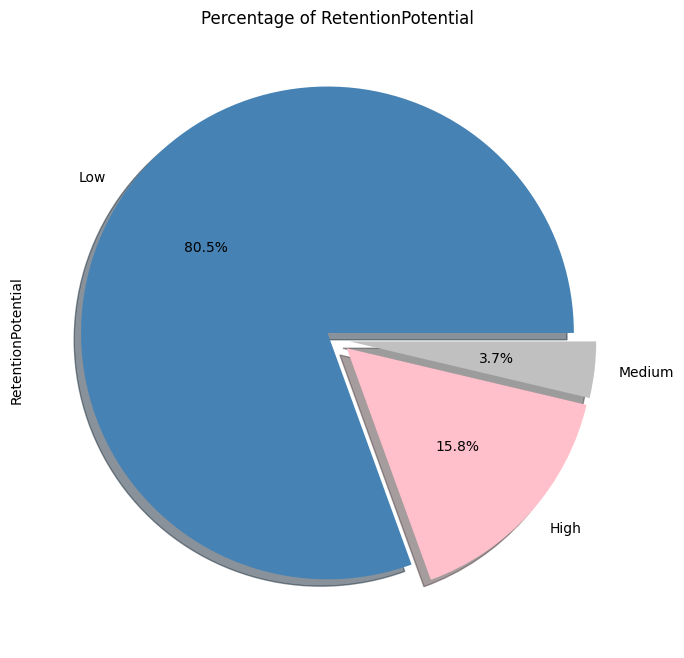

In [ ]:
#Percentage of the target attribute 'Retention potential' that is present in the train data
plt.figure(figsize=(18,8))
mycolors=['steelblue','pink','silver']
myexplode = (0.05,0.05,0.05)
train_data['RetentionPotential'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=myexplode,colors=mycolors);
plt.title('Percentage of RetentionPotential');

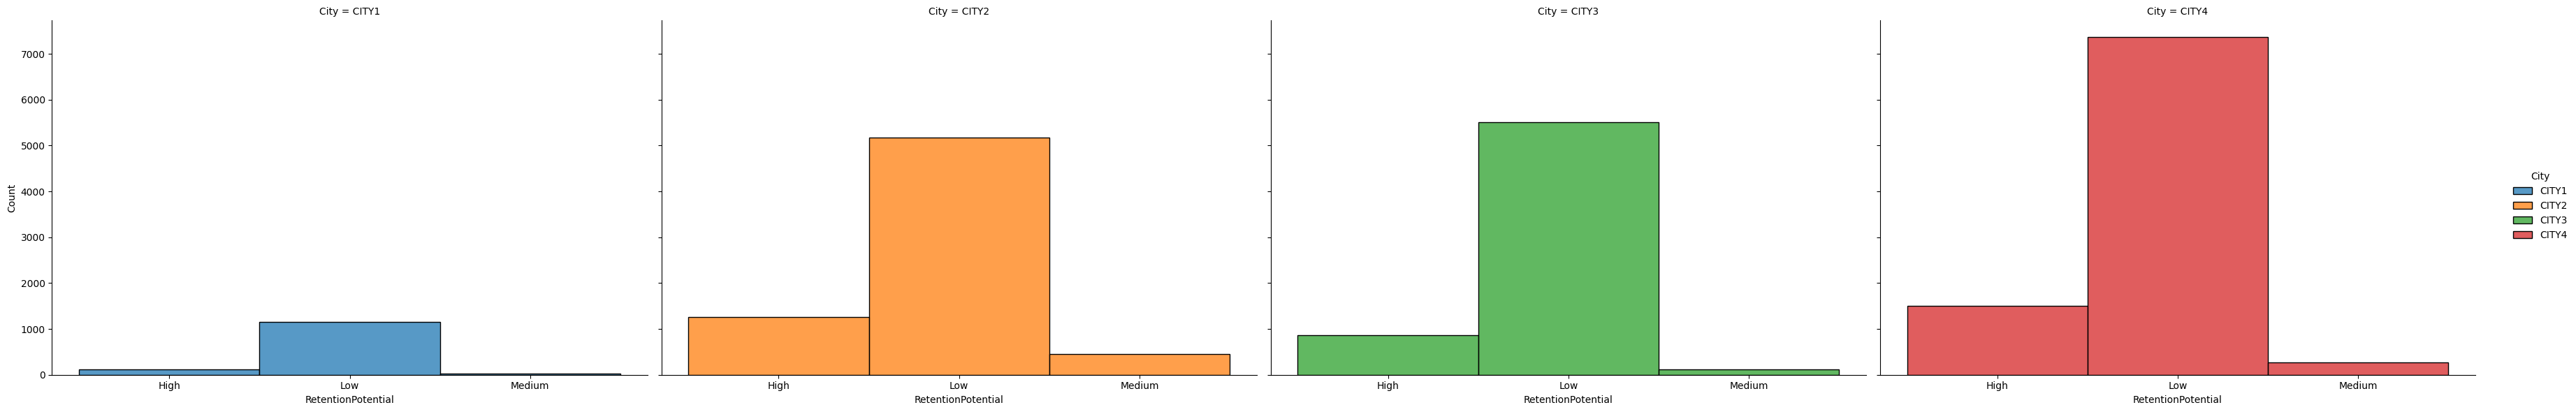

In [ ]:
#RetentionPotential based on City in train data
sns.displot(data=train_data, x="RetentionPotential", hue='City', col="City", kind="hist", height=6, aspect=1.5,multiple="stack")

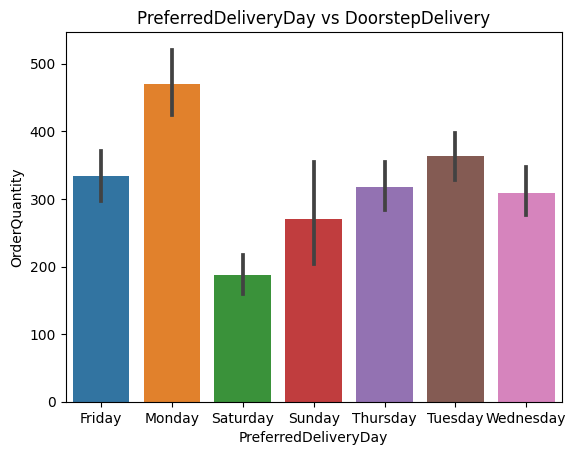

In [ ]:
#Plotting the bargraph to determine which Delivery day receives more orders

sns.barplot(x = 'PreferredDeliveryDay', y ='OrderQuantity', data = train_data)
plt.title("PreferredDeliveryDay vs DoorstepDelivery")
plt.show()

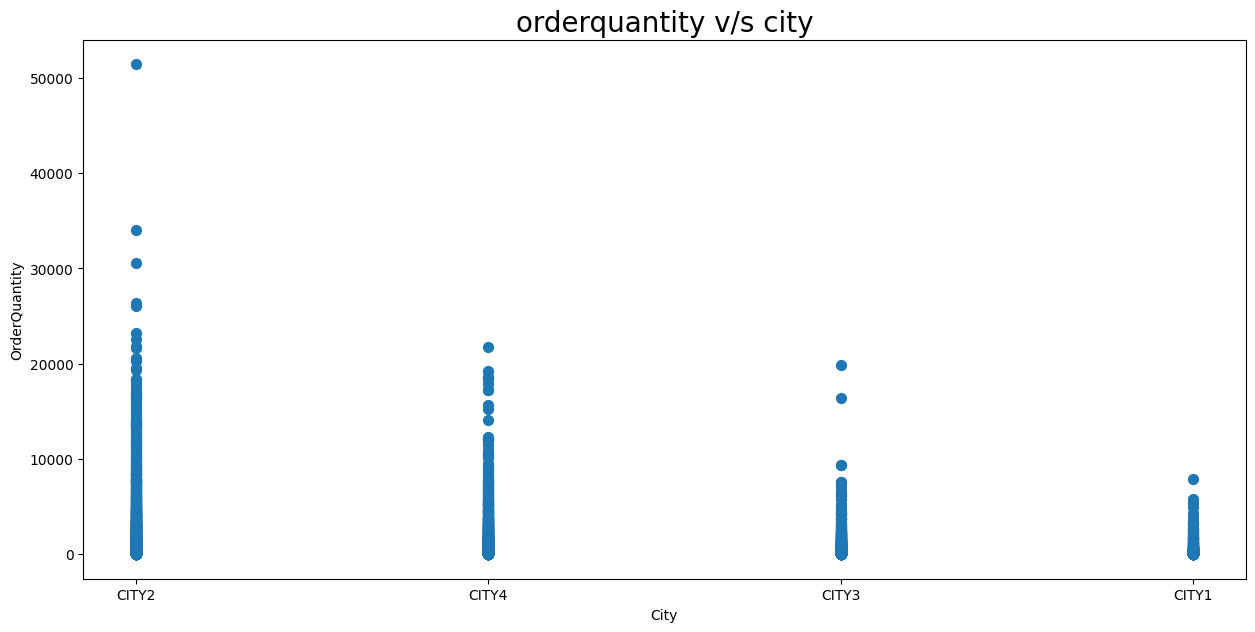

In [ ]:
#Plotting the scatter plot to identify the city with the highest order volume 
plt.figure(1 , figsize = (15 , 7))
plt.title('orderquantity v/s city', fontsize = 20)
plt.xlabel('City')
plt.ylabel('OrderQuantity')
plt.scatter( x = 'City', y = 'OrderQuantity', data = train_data, s = 50)
plt.show()

####Feature engineering

In [ ]:
#Dropping the unwanted columns before training the model
train_data.drop(['DateOfRegistration','CustomerID','DateOfemail','timestamp'], axis=1, inplace=True)

In [ ]:
#Replacing target column values with those specified in the problem statement
train_data['RetentionPotential'].replace(to_replace='High',value='0',inplace=True)
train_data['RetentionPotential'].replace(to_replace='Medium',value='1',inplace=True)
train_data['RetentionPotential'].replace(to_replace='Low',value='2',inplace=True)

In [ ]:
#Checking the target attribute after changing the values
train_data['RetentionPotential'].value_counts(normalize=True)*100

2    80.541562
0    15.768262
1     3.690176
Name: RetentionPotential, dtype: float64

***Splitting the data into train and test data

In [ ]:
#Removing the target column from main data and assining to new variable
X = train_data.drop('RetentionPotential', axis=1)
y = train_data['RetentionPotential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Checking the data of X
X

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0      CITY2                    0                0                 0   
1      CITY2                    1                1                 1   
2      CITY2                    0                0                 0   
3      CITY4                    0                0                 0   
4      CITY2                    1                1                 0   
...      ...                  ...              ...               ...   
23815  CITY2                    1                1                 0   
23816  CITY3                    1                0                 1   
23817  CITY3                    1                0                 0   
23818  CITY3                    1                1                 0   
23819  CITY4                    1                0                 0   

      PreferredDeliveryDay     EmailType MailOpened    MailClicked  \
0                   Monday  WelcomeEmail        yes            yes   
1                   Friday  WelcomeEmail        yes            yes   
2                Wednesday  WelcomeEmail        yes  NotApplicable   
3                   Monday  WelcomeEmail        yes            yes   
4                   Friday  WelcomeEmail        yes            yes   
...                    ...           ...        ...            ...   
23815               Friday  WelcomeEmail        yes  NotApplicable   
23816               Friday  WelcomeEmail        yes  NotApplicable   
23817             Saturday  WelcomeEmail        yes  NotApplicable   
23818             Saturday  WelcomeEmail        yes            yes   
23819               Friday  WelcomeEmail        yes  NotApplicable   

       OrderQuantity  
0                 15  
1              15614  
2                443  
3                748  
4               2350  
...              ...  
23815             41  
23816             56  
23817             35  
23818            100  
23819             41  

[23820 rows x 9 columns]

In [ ]:
#checking the data of y
y

0        0
1        2
2        1
3        2
4        2
        ..
23815    2
23816    2
23817    2
23818    2
23819    2
Name: RetentionPotential, Length: 23820, dtype: category
Categories (3, object): ['0', '2', '1']

In [ ]:
#Checking the shapes after splitting the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16674, 9), (7146, 9), (16674,), (7146,))

In [ ]:
#Separating the category attributes from X_train to perform encoding
cat_attr=X_train.select_dtypes(include=['category']).columns
cat_attr

Index(['City', 'PreferredDeliveryDay', 'EmailType', 'MailOpened',
       'MailClicked'],
      dtype='object')

In [ ]:
#X_train's numerical attributes are separated in order to do scaling
num_attr = X_train.select_dtypes(include=['float64', 'int64']).columns
num_attr

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'OrderQuantity'],
      dtype='object')

***Encoding the categorical attributes

In [ ]:
#Executing the OneHotEncoding on the categorical attributes
enc = OneHotEncoder(drop = 'first')
enc.fit(X_train[cat_attr])

X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()

***Scaling the numerical attributes

In [ ]:
#Preforming the StandardScaling on the numerical attributes
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

X_train_m = scaler.transform(X_train[num_attr])
X_test_m = scaler.transform(X_test[num_attr])

In [ ]:
#Combining the category and numerical attributes
X_train_con = np.concatenate([X_train_m, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_m, X_test_ohe], axis=1)

In [ ]:
#checking shape of splitted data
X_train_con.shape, y_train.shape, X_test_con.shape, y_test.shape 

((16674, 15), (16674,), (7146, 15), (7146,))

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE object with sampling_strategy parameter
smote = SMOTE(sampling_strategy='minority')

# Oversample minority class
X_sm, y_sm = smote.fit_resample(X_train_con, y_train)
print(X_sm.shape,y_sm.shape)


(29505, 15) (29505,)


####Importing Evaluation Metrics

In [ ]:
#Adding error metrics to a function to get results
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,classification_report
    print("confusion_matrix\n",confusion_matrix(act,pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,average='weighted'))
    print("Precision: ", precision_score(act, pred,average='weighted')) 

###Modelling

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train_con, y_train)

train_pred_rf = model2.predict(X_train_con)
test_pred_rf = model2.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_rf)
print("--Test--")
evaluate_model(y_test, test_pred_rf)

--Train--
confusion_matrix
 [[ 1630     1   988]
 [    3   546    63]
 [  245     1 13197]]
Accurcay :  0.9219743312942306
Recall   :  0.9219743312942306
Precision:  0.9196529928653608
--Test--
confusion_matrix
 [[ 427   20  690]
 [  22  121  124]
 [ 395   72 5275]]
Accurcay :  0.8148614609571788
Recall   :  0.8148614609571788
Precision:  0.7978309654938484


##### Xg Boost

In [ ]:
from xgboost import XGBClassifier

# Convert target variable to integer values
y_train_int = y_train.astype(int)
y_test_int=y_test.astype(int)

model3 = XGBClassifier()
model3.fit(X_train_con, y_train_int)

train_pred_xg = model3.predict(X_train_con)
test_pred_xg = model3.predict(X_test_con)


In [ ]:
print("--Train--")
evaluate_model(y_train_int, train_pred_xg)
print("--Test--")
evaluate_model(y_test_int, test_pred_xg)

--Train--
confusion_matrix
 [[ 1185    11  1423]
 [   21   379   212]
 [  433     5 13005]]
Accurcay :  0.873755547559074
Recall   :  0.873755547559074
Precision:  0.8649654115879805
--Test--
confusion_matrix
 [[ 440   20  677]
 [  15  123  129]
 [ 234    6 5502]]
Accurcay :  0.848726560313462
Recall   :  0.848726560313462
Precision:  0.8333089022188851


#### Applying model on sampled data

In [ ]:
from xgboost import XGBClassifier

# Convert target variable to integer values
y_trainsm_int = y_sm.astype(int)
y_test_int=y_test.astype(int)

modelxgsm = XGBClassifier()
modelxgsm.fit(X_sm, y_trainsm_int)

train_pred_xgsm = modelxgsm.predict(X_sm)
test_pred_xgsm = modelxgsm.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_trainsm_int, train_pred_xgsm)
print("--Test--")
evaluate_model(y_test_int, test_pred_xgsm)

--Train--
confusion_matrix
 [[ 1104   107  1408]
 [   45 12746   652]
 [  508   424 12511]]
Accurcay :  0.8934417895271988
Recall   :  0.8934417895271988
Precision:  0.8877403902515976
--Test--
confusion_matrix
 [[ 449   56  632]
 [   2  154  111]
 [ 235  249 5258]]
Accurcay :  0.8201791211866779
Recall   :  0.8201791211866779
Precision:  0.8207160977813476


###GridSearch CV 

#####RF-Hyperparameter Tuning

In [ ]:

params = {'n_estimators':[50,100],
          "max_features" : [5, 7],
          'criterion':['gini','entropy']}


In [ ]:
clf1 = RandomForestClassifier()
gs1 = GridSearchCV(clf1,params,cv=2)
gs1.fit(X_train_con,y_train)

#print("All Possible Parameters",gs1.get_params)
print("Best set of Parameters",gs1.best_params_)
print("Best Score",gs1.best_score_)

Best set of Parameters {'criterion': 'entropy', 'max_features': 7, 'n_estimators': 50}
Best Score 0.8270960777258007


In [ ]:
train_pred_gs_rf = gs1.predict(X_train_con)
test_pred_gs_rf = gs1.predict(X_test_con)

print("--Train--")
evaluate_model(y_train, train_pred_gs_rf)
print("--Test--")
evaluate_model(y_test, test_pred_gs_rf)

--Train--
confusion_matrix
 [[ 1645     3   971]
 [    1   548    63]
 [  270     3 13170]]
Accurcay :  0.9213745951781216
Recall   :  0.9213745951781216
Precision:  0.9186960073051935
--Test--
confusion_matrix
 [[ 435   23  679]
 [  21  122  124]
 [ 371   43 5328]]
Accurcay :  0.8235376434368877
Recall   :  0.8235376434368877
Precision:  0.8062236205727558


####GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_con, y_train)

GradientBoostingClassifier()

In [ ]:
train_pred_gbc = gbc.predict(X_train_con)
test_pred_gbc = gbc.predict(X_test_con)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_gbc)
print("--Test--")
evaluate_model(y_test, test_pred_gbc)

--Train--
confusion_matrix
 [[ 1108    40  1471]
 [   29   320   263]
 [  536     9 12898]]
Accurcay :  0.8591819599376275
Recall   :  0.8591819599376275
Precision:  0.8465369441845617
--Test--
confusion_matrix
 [[ 472   23  642]
 [  10  123  134]
 [ 233    4 5505]]
Accurcay :  0.8536244052616848
Recall   :  0.8536244052616848
Precision:  0.8399259676654057


####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
params_ada =[    
    {'n_estimators' : [10,50],
    'learning_rate' : [0.001,0.01]
    }
]

clf3 = AdaBoostClassifier()
gs3 = GridSearchCV(clf3,params_ada,cv=5)
gs3.fit(X_train_con,y_train)

#print("All Possible Parameters",gs1.get_params)
print("Best set of Parameters",gs3.best_params_)
print("Best Score",gs3.best_score_)

Best set of Parameters {'learning_rate': 0.001, 'n_estimators': 10}
Best Score 0.8062252616942878


In [ ]:
train_pred_gs_ada = gs3.predict(X_train_con)
test_pred_gs_ada = gs3.predict(X_test_con)

print("--Train--")
evaluate_model(y_train, train_pred_gs_ada)
print("--Test--")
evaluate_model(y_test, test_pred_gs_ada)

--Train--
confusion_matrix
 [[    0     0  2619]
 [    0     0   612]
 [    0     0 13443]]
Accurcay :  0.8062252608852105
Recall   :  0.8062252608852105
Precision:  0.6499991712894257
--Test--
confusion_matrix
 [[   0    0 1137]
 [   0    0  267]
 [   0    0 5742]]
Accurcay :  0.8035264483627204
Recall   :  0.8035264483627204
Precision:  0.6456547532184075


####XGBClassifier

In [ ]:

param =[    
    {'gamma' : [0.5,0.7],
     'max_depth':[3,5,7]
    }
]

xgb = XGBClassifier()
xgb_gs = GridSearchCV(xgb,param)
xgb_gs.fit(X_train_con,y_train_int)

#print("All Possible Parameters",gs1.get_params)
print("Best set of Parameters",xgb_gs.best_params_)
print("Best Score",xgb_gs.best_score_)

Best set of Parameters {'gamma': 0.7, 'max_depth': 5}
Best Score 0.8570226344536189


In [ ]:
train_pred_gs_xgb = xgb_gs.predict(X_train_con)
test_pred_gs_xgb = xgb_gs.predict(X_test_con)

print("--Train--")
evaluate_model(y_train_int, train_pred_gs_xgb)
print("--Test--")
evaluate_model(y_test_int, test_pred_gs_xgb)

--Train--
confusion_matrix
 [[ 1149    33  1437]
 [   31   325   256]
 [  548     8 12887]]
Accurcay :  0.8612810363440087
Recall   :  0.8612810363440087
Precision:  0.84964147053125
--Test--
confusion_matrix
 [[ 483   22  632]
 [  12  125  130]
 [ 246    3 5493]]
Accurcay :  0.853764343688777
Recall   :  0.853764343688777
Precision:  0.8404864849592297


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create a binary logistic regression classifier
clf = LogisticRegression()

# Wrap the binary classifier in a OneVsRestClassifier
ovr_clf = OneVsRestClassifier(clf)

# Train the multi-class classifier
ovr_clf.fit(X_train_con, y_train)

# Make predictions on the test set
y_pred = ovr_clf.predict(X_train_con)
y_pred = ovr_clf.predict(X_test_con)

# Evaluate the accuracy of the multi-class classifier
accuracy_train = ovr_clf.score(X_train_con, y_train)
accuracy_test = ovr_clf.score(X_test_con, y_test)
print("Accuracy:", accuracy_train)
print("Accuracy:", accuracy_test)


Accuracy: 0.8334532805565551
Accuracy: 0.8333333333333334


##Test_data

####Loading

In [ ]:
#loading every dataset provided by the train data
Customer_test = pd.read_excel('/content/Customerdata_Test.xlsx')
Email_test = pd.read_excel('/content/Emaildata_Test.xlsx')
Train_test = pd.read_excel('/content/Test.xlsx')
Tran_test = pd.read_excel('/content/transactionsdata_Test.xlsx')

In [ ]:
#Checking the shapes of loaded data
Customer_test.shape,Email_test.shape,Train_test.shape,Tran_test.shape

((5955, 7), (129074, 6), (5955, 1), (26768, 4))

####Merging

In [ ]:
#Verifying the Customer data
Customer_test.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C17838  CITY4         2010-10-22                    0                0   
1     C12403  CITY2         2008-11-17                    1                1   
2     C19041  CITY4         2011-01-24                    0                1   
3     C24069  CITY2         2010-09-18                    0                0   
4     C26718  CITY2         2010-10-02                    1                0   

   DoorstepDelivery PreferredDeliveryDay  
0                 0             Thursday  
1                 0            Wednesday  
2                 0               Friday  
3                 0            Wednesday  
4                 0               Monday

In [ ]:
#Verifying the Email data
Email_test.head()

CustomerID DateOfemail     EmailType timestamp MailOpened    MailClicked
0     C17838  2010-10-22  WelcomeEmail  16:59:02        yes  NotApplicable
1     C12403  2008-11-17  WelcomeEmail  12:46:56        yes  NotApplicable
2     C19041  2011-01-24  WelcomeEmail  14:35:22        yes  NotApplicable
3     C24069  2010-09-18  WelcomeEmail  12:25:26        yes  NotApplicable
4     C26718  2010-10-02  WelcomeEmail  11:55:58        yes  NotApplicable

In [ ]:
#Verifying the Train data
Train_test.head()

CustomerID
0     C12121
1     C12132
2     C12134
3     C12135
4     C12136

In [ ]:
#Verifying the Transaction data
Tran_test.head()

CustomerID DateOfOrder timestamp  OrderQuantity
0     C17838  2011-03-28  17:41:08             55
1     C12403  2010-10-12  15:58:02            174
2     C12403  2010-11-27  20:13:48            171
3     C12403  2011-12-09  14:34:44            166
4     C12403  2011-03-04  18:20:18            179

In [ ]:
#The groupby.max() method is utilised to identify the rows with the maximum values.
data_test = Email_test.groupby(['CustomerID']).max()
data_test

DateOfemail     EmailType timestamp MailOpened    MailClicked
CustomerID                                                              
C12121      2017-12-13  WelcomeEmail  17:51:06        yes            yes
C12132      2013-10-20  WelcomeEmail  13:59:08        yes  NotApplicable
C12134      2013-09-18  WelcomeEmail  13:21:28        yes  NotApplicable
C12135      2018-01-10  WelcomeEmail  17:06:56        yes            yes
C12136      2013-10-19  WelcomeEmail  17:59:08        yes            yes
...                ...           ...       ...        ...            ...
C42153      2012-11-08  WelcomeEmail  17:12:20        yes            yes
C42155      2013-09-14  WelcomeEmail  11:51:38        yes  NotApplicable
C42157      2013-09-30  WelcomeEmail  17:53:26        yes  NotApplicable
C42167      2017-11-04  WelcomeEmail  17:54:00        yes            yes
C42190      2013-09-06  WelcomeEmail  11:34:38        yes  NotApplicable

[5955 rows x 5 columns]

In [ ]:
##In order to determine the overall order quantity for each customer, the groupby.sum method is used.
data1_test = Tran_test.groupby(['CustomerID']).sum()
data1_test

OrderQuantity
CustomerID               
C12121                 52
C12132                 40
C12134                 40
C12135                 41
C12136                 79
...                   ...
C42153                379
C42155                 41
C42157                 41
C42167                502
C42190                 40

[5955 rows x 1 columns]

In [ ]:
#Utilizing Outer merge to combine the provided customer data with email data (which has already been modified).
merge1_test = pd.merge(Customer_test,data_test,on='CustomerID',how='outer')
merge1_test

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay DateOfemail  \
0                   0                 0             Thursday  2010-10-22   
1                   1                 0            Wednesday  2013-12-29   
2                   1                 0               Friday  2013-12-31   
3                   0                 0            Wednesday  2010-11-08   
4                   0                 0               Monday  2014-01-12   
...               ...               ...                  ...         ...   
5950                0                 0               Friday  2018-01-17   
5951                0                 0               Friday  2018-01-17   
5952                0                 0               Monday  2018-01-17   
5953                0                 0               Friday  2018-01-17   
5954                0                 0               Friday  2018-01-17   

         EmailType timestamp MailOpened    MailClicked  
0     WelcomeEmail  16:59:02        yes  NotApplicable  
1     WelcomeEmail  17:53:10        yes            yes  
2     WelcomeEmail  17:58:56        yes            yes  
3     WelcomeEmail  17:49:40        yes             no  
4     WelcomeEmail  15:06:44        yes            yes  
...            ...       ...        ...            ...  
5950  WelcomeEmail  13:05:56        yes  NotApplicable  
5951  WelcomeEmail  15:45:18        yes  NotApplicable  
5952  WelcomeEmail  11:51:28        yes  NotApplicable  
5953  WelcomeEmail  10:25:30        yes  NotApplicable  
5954  WelcomeEmail  14:36:32        yes  NotApplicable  

[5955 rows x 12 columns]

In [ ]:
#the altered "order quantity" is combined with the "customer and email data" that have previously been combined.
merge2_test = pd.merge(merge1_test,data1_test,on='CustomerID',how='outer')
merge2_test

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay DateOfemail  \
0                   0                 0             Thursday  2010-10-22   
1                   1                 0            Wednesday  2013-12-29   
2                   1                 0               Friday  2013-12-31   
3                   0                 0            Wednesday  2010-11-08   
4                   0                 0               Monday  2014-01-12   
...               ...               ...                  ...         ...   
5950                0                 0               Friday  2018-01-17   
5951                0                 0               Friday  2018-01-17   
5952                0                 0               Monday  2018-01-17   
5953                0                 0               Friday  2018-01-17   
5954                0                 0               Friday  2018-01-17   

         EmailType timestamp MailOpened    MailClicked  OrderQuantity  
0     WelcomeEmail  16:59:02        yes  NotApplicable             55  
1     WelcomeEmail  17:53:10        yes            yes          29537  
2     WelcomeEmail  17:58:56        yes            yes          14321  
3     WelcomeEmail  17:49:40        yes             no             47  
4     WelcomeEmail  15:06:44        yes            yes          20238  
...            ...       ...        ...            ...            ...  
5950  WelcomeEmail  13:05:56        yes  NotApplicable             41  
5951  WelcomeEmail  15:45:18        yes  NotApplicable             40  
5952  WelcomeEmail  11:51:28        yes  NotApplicable             36  
5953  WelcomeEmail  10:25:30        yes  NotApplicable             75  
5954  WelcomeEmail  14:36:32        yes  NotApplicable             40  

[5955 rows x 13 columns]

In [ ]:
#merging the combined data & given test data
test_data = pd.merge(merge2_test,Train_test,on='CustomerID',how='outer')
test_data

CustomerID   City DateOfRegistration  OnlineCommunication  \
0        C17838  CITY4         2010-10-22                    0   
1        C12403  CITY2         2008-11-17                    1   
2        C19041  CITY4         2011-01-24                    0   
3        C24069  CITY2         2010-09-18                    0   
4        C26718  CITY2         2010-10-02                    1   
...         ...    ...                ...                  ...   
5950     C32947  CITY2         2018-01-17                    1   
5951     C28951  CITY3         2018-01-17                    1   
5952     C38741  CITY3         2018-01-17                    1   
5953     C20407  CITY2         2018-01-17                    1   
5954     C27220  CITY3         2018-01-17                    1   

      AutomaticRefill  DoorstepDelivery PreferredDeliveryDay DateOfemail  \
0                   0                 0             Thursday  2010-10-22   
1                   1                 0            Wednesday  2013-12-29   
2                   1                 0               Friday  2013-12-31   
3                   0                 0            Wednesday  2010-11-08   
4                   0                 0               Monday  2014-01-12   
...               ...               ...                  ...         ...   
5950                0                 0               Friday  2018-01-17   
5951                0                 0               Friday  2018-01-17   
5952                0                 0               Monday  2018-01-17   
5953                0                 0               Friday  2018-01-17   
5954                0                 0               Friday  2018-01-17   

         EmailType timestamp MailOpened    MailClicked  OrderQuantity  
0     WelcomeEmail  16:59:02        yes  NotApplicable             55  
1     WelcomeEmail  17:53:10        yes            yes          29537  
2     WelcomeEmail  17:58:56        yes            yes          14321  
3     WelcomeEmail  17:49:40        yes             no             47  
4     WelcomeEmail  15:06:44        yes            yes          20238  
...            ...       ...        ...            ...            ...  
5950  WelcomeEmail  13:05:56        yes  NotApplicable             41  
5951  WelcomeEmail  15:45:18        yes  NotApplicable             40  
5952  WelcomeEmail  11:51:28        yes  NotApplicable             36  
5953  WelcomeEmail  10:25:30        yes  NotApplicable             75  
5954  WelcomeEmail  14:36:32        yes  NotApplicable             40  

[5955 rows x 13 columns]

In [ ]:
#info of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   object        
 1   City                  5955 non-null   object        
 2   DateOfRegistration    5955 non-null   datetime64[ns]
 3   OnlineCommunication   5955 non-null   int64         
 4   AutomaticRefill       5955 non-null   int64         
 5   DoorstepDelivery      5955 non-null   int64         
 6   PreferredDeliveryDay  5955 non-null   object        
 7   DateOfemail           5955 non-null   object        
 8   EmailType             5955 non-null   object        
 9   timestamp             5955 non-null   object        
 10  MailOpened            5955 non-null   object        
 11  MailClicked           5955 non-null   object        
 12  OrderQuantity         5955 non-null   int64         
dtypes: datetime64[ns](

In [ ]:
#Checking the data types of test data
test_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5950    False
5951    False
5952    False
5953    False
5954    False
Length: 5955, dtype: bool

In [ ]:
#Summary Statistics of test data
test_data.describe()

OnlineCommunication  AutomaticRefill  DoorstepDelivery  OrderQuantity
count          5955.000000      5955.000000       5955.000000    5955.000000
mean              0.659278         0.095046          0.038959     379.416793
std               0.473992         0.293303          0.193513    1665.587177
min               0.000000         0.000000          0.000000       1.000000
25%               0.000000         0.000000          0.000000      41.000000
50%               1.000000         0.000000          0.000000      63.000000
75%               1.000000         0.000000          0.000000     162.000000
max               1.000000         1.000000          1.000000   57960.000000

####Feature Engineering

In [ ]:
test_data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
DateOfemail                     object
EmailType                       object
timestamp                       object
MailOpened                      object
MailClicked                     object
OrderQuantity                    int64
dtype: object

In [ ]:
#Converting Date of email dtype cause it is given as object
test_data["DateOfemail"] = test_data["DateOfemail"].astype('datetime64[ns]')

In [ ]:
test_data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
DateOfemail             datetime64[ns]
EmailType                       object
timestamp                       object
MailOpened                      object
MailClicked                     object
OrderQuantity                    int64
dtype: object

In [ ]:
#Converting the Objects into category 
for col in ['CustomerID', 'City','PreferredDeliveryDay',
       'EmailType','MailOpened','MailClicked']:
    test_data[col] = test_data[col].astype('category')

In [ ]:
test_data.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
timestamp               0
MailOpened              0
MailClicked             0
OrderQuantity           0
dtype: int64

In [ ]:
#Copying the CustomerID into another dataframe 
final=pd.DataFrame(test_data['CustomerID'].copy())

In [ ]:
final

CustomerID
0        C17838
1        C12403
2        C19041
3        C24069
4        C26718
...         ...
5950     C32947
5951     C28951
5952     C38741
5953     C20407
5954     C27220

[5955 rows x 1 columns]

In [ ]:
#Dropping the unwanted columns before Making the Predictions
test_data.drop(['DateOfRegistration','DateOfemail','timestamp','CustomerID'], axis=1, inplace=True)

In [ ]:
test_data.dtypes

City                    category
OnlineCommunication        int64
AutomaticRefill            int64
DoorstepDelivery           int64
PreferredDeliveryDay    category
EmailType               category
MailOpened              category
MailClicked             category
OrderQuantity              int64
dtype: object

In [ ]:
#test data numerical attributes are separated in order to do scaling
test_num_attr = test_data.select_dtypes(include=['float64', 'int64']).columns
#Separating the category attributes from test data to perform encoding
test_cat_attr= test_data.select_dtypes(include=['category']).columns

In [ ]:
test_num_attr

In [ ]:
test_cat_attr

####Encoding

In [ ]:
#Executing the OneHotEncoding on the categorical attributes
enc1 = OneHotEncoder(drop = 'first')
enc1.fit(test_data[test_cat_attr])

test_ohe=enc1.transform(test_data[test_cat_attr]).toarray()
test_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#Preforming the StandardScaling on the numerical attributes
scaler1 = StandardScaler()
scaler1.fit(test_data[test_num_attr])

test_std = scaler1.transform(test_data[test_num_attr])
test_std

array([[-1.3910224 , -0.32408141, -0.20134095, -0.19479259],
       [ 0.71889568,  3.08564441, -0.20134095, 17.50735841],
       [-1.3910224 ,  3.08564441, -0.20134095,  8.37107425],
       ...,
       [ 0.71889568, -0.32408141, -0.20134095, -0.20620093],
       [ 0.71889568, -0.32408141, -0.20134095, -0.1827838 ],
       [ 0.71889568, -0.32408141, -0.20134095, -0.20379918]])

In [ ]:
#Combining the category and numerical attributes
test_con = np.concatenate([test_std, test_ohe], axis=1)

##final predictions

In [ ]:
test_data

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     CITY4                    0                0                 0   
1     CITY2                    1                1                 0   
2     CITY4                    0                1                 0   
3     CITY2                    0                0                 0   
4     CITY2                    1                0                 0   
...     ...                  ...              ...               ...   
5950  CITY2                    1                0                 0   
5951  CITY3                    1                0                 0   
5952  CITY3                    1                0                 0   
5953  CITY2                    1                0                 0   
5954  CITY3                    1                0                 0   

     PreferredDeliveryDay     EmailType MailOpened    MailClicked  \
0                Thursday  WelcomeEmail        yes  NotApplicable   
1               Wednesday  WelcomeEmail        yes            yes   
2                  Friday  WelcomeEmail        yes            yes   
3               Wednesday  WelcomeEmail        yes             no   
4                  Monday  WelcomeEmail        yes            yes   
...                   ...           ...        ...            ...   
5950               Friday  WelcomeEmail        yes  NotApplicable   
5951               Friday  WelcomeEmail        yes  NotApplicable   
5952               Monday  WelcomeEmail        yes  NotApplicable   
5953               Friday  WelcomeEmail        yes  NotApplicable   
5954               Friday  WelcomeEmail        yes  NotApplicable   

      OrderQuantity  
0                55  
1             29537  
2             14321  
3                47  
4             20238  
...             ...  
5950             41  
5951             40  
5952             36  
5953             75  
5954             40  

[5955 rows x 9 columns]

In [ ]:
test_con

array([[-1.3910224 , -0.32408141, -0.20134095, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71889568,  3.08564441, -0.20134095, ...,  1.        ,
         0.        ,  1.        ],
       [-1.3910224 ,  3.08564441, -0.20134095, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.71889568, -0.32408141, -0.20134095, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71889568, -0.32408141, -0.20134095, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71889568, -0.32408141, -0.20134095, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#Making Predictions on test data
final_pred=xgb_gs.predict(test_con)

In [ ]:
#Verfying the Predictions
final_pred

array([0, 2, 2, ..., 2, 2, 2])

In [ ]:
#Predictions are converting into a dataframe & assinging the name of the column
dataframe = pd.DataFrame(final_pred, columns= ['RetentionPotential'])
dataframe

RetentionPotential
0                      0
1                      2
2                      2
3                      2
4                      2
...                  ...
5950                   2
5951                   2
5952                   2
5953                   2
5954                   2

[5955 rows x 1 columns]

In [ ]:
dataframe['RetentionPotential'].value_counts(normalize=True)*100

2    86.633081
0    11.200672
1     2.166247
Name: RetentionPotential, dtype: float64

In [ ]:
dataframe['CustomerID'] =final['CustomerID']

In [ ]:
dataframe

RetentionPotential CustomerID
0                      0     C17838
1                      2     C12403
2                      2     C19041
3                      2     C24069
4                      2     C26718
...                  ...        ...
5950                   2     C32947
5951                   2     C28951
5952                   2     C38741
5953                   2     C20407
5954                   2     C27220

[5955 rows x 2 columns]

In [ ]:
df2=dataframe.copy()
df2

RetentionPotential CustomerID
0                      0     C17838
1                      2     C12403
2                      2     C19041
3                      2     C24069
4                      2     C26718
...                  ...        ...
5950                   2     C32947
5951                   2     C28951
5952                   2     C38741
5953                   2     C20407
5954                   2     C27220

[5955 rows x 2 columns]

In [ ]:
#Assigning the CustomerID as first Column
first_column = dataframe.pop('CustomerID')
dataframe.insert(0,'CustomerID',first_column)

In [ ]:
#Replacing predicted column values with those specified in the problem statement
df2['RetentionPotential'].replace(to_replace=0,value="1",inplace=True)
df2['RetentionPotential'].replace(to_replace=1,value="2",inplace=True)               ##Replace med = 1, high = 0 , low = 2
df2['RetentionPotential'].replace(to_replace=2,value="0",inplace=True)

In [ ]:
#Verifying RetentionPotential value counts
df2['RetentionPotential'].value_counts(normalize=True)*100

0    86.633081
1    11.200672
2     2.166247
Name: RetentionPotential, dtype: float64

xgboost algorithm which fit for the sample data is taken to predict the test data.

In [ ]:
final_predsm=modelxgsm.predict(test_con)

In [ ]:
final_predsm

array([0, 2, 2, ..., 2, 2, 2])

In [ ]:
#Predictions are converting into a dataframe & assinging the name of the column
dataframe1 = pd.DataFrame(final_predsm, columns= ['RetentionPotential'])
dataframe1

RetentionPotential
0                      0
1                      2
2                      2
3                      2
4                      2
...                  ...
5950                   2
5951                   2
5952                   2
5953                   2
5954                   2

[5955 rows x 1 columns]

In [ ]:
dataframe1['RetentionPotential'].value_counts(normalize=True)*100

2    81.225861
0    10.243493
1     8.530647
Name: RetentionPotential, dtype: float64

In [ ]:
dataframe1['CustomerID'] =final['CustomerID']
dataframe1

RetentionPotential CustomerID
0                      0     C17838
1                      2     C12403
2                      2     C19041
3                      2     C24069
4                      2     C26718
...                  ...        ...
5950                   2     C32947
5951                   2     C28951
5952                   2     C38741
5953                   2     C20407
5954                   2     C27220

[5955 rows x 2 columns]

In [ ]:
#Assigning the CustomerID as first Column
first_column = dataframe1.pop('CustomerID')
dataframe1.insert(0,'CustomerID',first_column)

In [ ]:
#Replacing predicted column values with those specified in the problem statement
dataframe1['RetentionPotential'].replace(to_replace=0,value="1",inplace=True)
dataframe1['RetentionPotential'].replace(to_replace=1,value="2",inplace=True)               ##Replace med = 1, high = 0 , low = 2
dataframe1['RetentionPotential'].replace(to_replace=2,value="0",inplace=True)

In [ ]:
dataframe1['RetentionPotential'].value_counts(normalize=True)*100

0    81.225861
1    10.243493
2     8.530647
Name: RetentionPotential, dtype: float64

In [ ]:
df2.to_csv('/content/Krishnaveni_4575.csv',index=False)